In [1]:
!pip install geopy

# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
os.chdir(r"C:\Users\hp\OneDrive - The University of Texas at Dallas\Spring 2025\Applied ML\Project\data")
data = pd.read_csv("train.csv")

data.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [2]:
# Data cleaning:
# Remove '(min)' from 'Time_taken(min)' and convert it to an integer
data['Time_taken(min)'] = data['Time_taken(min)'].str.replace(r'\(min\)\s*', '', regex=True).astype(int)

# Remove 'conditions' prefix from 'Weatherconditions'
data['Weatherconditions'] = data['Weatherconditions'].str.replace('conditions ', '')

data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [3]:
print(data.dtypes)

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                  int32
dtype: object


In [4]:
import pandas as pd

# Convert to numeric
data['Delivery_person_Age'] = pd.to_numeric(data['Delivery_person_Age'], errors='coerce')  # convert to int, NaNs if invalid
data['Delivery_person_Ratings'] = pd.to_numeric(data['Delivery_person_Ratings'], errors='coerce')  # convert to float
data['multiple_deliveries'] = pd.to_numeric(data['multiple_deliveries'], errors='coerce')  # convert to int (handle NaNs)

# Convert to categorical
categorical_columns = [
    'Weatherconditions',
    'Road_traffic_density',
    'Type_of_order',
    'Type_of_vehicle',
    'Festival',
    'City'
]
data[categorical_columns] = data[categorical_columns].astype('category')

#Convert to datetime
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], errors='coerce')
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], errors='coerce')



In [5]:
print(data.dtypes)

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                   float64
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                             object
Time_Orderd                    datetime64[ns]
Time_Order_picked              datetime64[ns]
Weatherconditions                    category
Road_traffic_density                 category
Vehicle_condition                       int64
Type_of_order                        category
Type_of_vehicle                      category
multiple_deliveries                   float64
Festival                             category
City                                 category
Time_taken(min)                         int32
dtype: object


In [6]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,2025-05-14 11:30:00,2025-05-14 11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,2025-05-14 19:45:00,2025-05-14 19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,2025-05-14 08:30:00,2025-05-14 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,2025-05-14 18:00:00,2025-05-14 18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,2025-05-14 13:30:00,2025-05-14 13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


In [7]:
# Check for missing values (NaN) in each column of the dataset
missing_values = data.isna().sum()

# Display the number of missing values for each column
print(missing_values)

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64


In [8]:
!pip install folium

import pandas as pd
import folium

# Step 1: Extract restaurant latitude and longitude columns
restaurant_data = data[['Restaurant_latitude', 'Restaurant_longitude']]

# Step 2: Create map centered on India
india_center = [20.5937, 78.9629]
map_all_restaurants = folium.Map(location=india_center, zoom_start=5)

# Step 3: Plot all restaurant latitudes and longitudes
for _, row in restaurant_data.iterrows():
    folium.CircleMarker(
        location=[row['Restaurant_latitude'], row['Restaurant_longitude']],
        radius=3,
        color='blue',  # Blue color for restaurant locations
        fill=True,
        fill_opacity=0.6
    ).add_to(map_all_restaurants)

# Step 4: Save the map as an HTML file to view
map_all_restaurants.save("all_restaurants_map1.html")
print("✅ Map saved as 'all_restaurants_map1.html'")



✅ Map saved as 'all_restaurants_map1.html'


In [9]:
!pip install folium

import pandas as pd
import folium

# Step 1: Extract delivery location latitude and longitude columns
delivery_data = data[['Delivery_location_latitude', 'Delivery_location_longitude']]    

# Step 2: Create map centered on India
india_center = [20.5937, 78.9629]
map_all_delivery_locations = folium.Map(location=india_center, zoom_start=5)

# Step 3: Plot all restaurant latitudes and longitudes
for _, row in delivery_data.iterrows():
    folium.CircleMarker(
        location=[row['Delivery_location_latitude'], row['Delivery_location_longitude']],
        radius=3,
        color='red',  # red color for delivery locations
        fill=True,
        fill_opacity=0.6
    ).add_to(map_all_delivery_locations)

# Step 4: Save the map as an HTML file to view
map_all_delivery_locations.save("map_all_delivery_locations1.html")
print("✅ Map saved as 'map_all_delivery_locations1.html'")

✅ Map saved as 'map_all_delivery_locations1.html'


In [10]:
# Convert negative latitudes and longitudes to positive for both restaurant and delivery locations
data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()
data['Restaurant_longitude'] = data['Restaurant_longitude'].abs()
data['Delivery_location_latitude'] = data['Delivery_location_latitude'].abs()
data['Delivery_location_longitude'] = data['Delivery_location_longitude'].abs()


In [11]:
# Import necessary libraries for distance calculation
from geopy.distance import geodesic

# Function to calculate distance between restaurant and delivery location (in km)
def calculate_distance(row):
    restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(restaurant_coords, delivery_coords).km  # return distance in km

# Apply function to create a new column for delivery radius
data['Delivery_distance_km'] = data.apply(calculate_distance, axis=1)


In [12]:
## add new column 'Order_to_Pickup_Duration'

duration = data['Time_Order_picked'] - data['Time_Orderd']
duration = duration.where(duration >= pd.Timedelta(0), duration + pd.Timedelta(days=1))

data['Order_to_Pickup_Duration'] = duration.dt.total_seconds() / 60

In [13]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Delivery_distance_km,Order_to_Pickup_Duration
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,2025-05-14 11:30:00,...,High,2,Snack,motorcycle,0.0,No,Urban,24,3.020737,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,2025-05-14 19:45:00,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.143737,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,2025-05-14 08:30:00,...,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.549693,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,2025-05-14 18:00:00,...,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.774497,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,2025-05-14 13:30:00,...,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.197898,15.0


In [14]:
cols_to_check = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
data = data[~(data[cols_to_check] == 0).any(axis=1)]


In [15]:
numerical_vars = ['Delivery_person_Age', 'Delivery_person_Ratings', 
                  'Delivery_distance_km', 'multiple_deliveries', 'Order_to_Pickup_Duration','Time_taken(min)']

categorical_vars = ['Vehicle_condition', 'Weatherconditions', 'Type_of_order',
                    'Type_of_vehicle', 'Festival', 'City', 'Road_traffic_density']


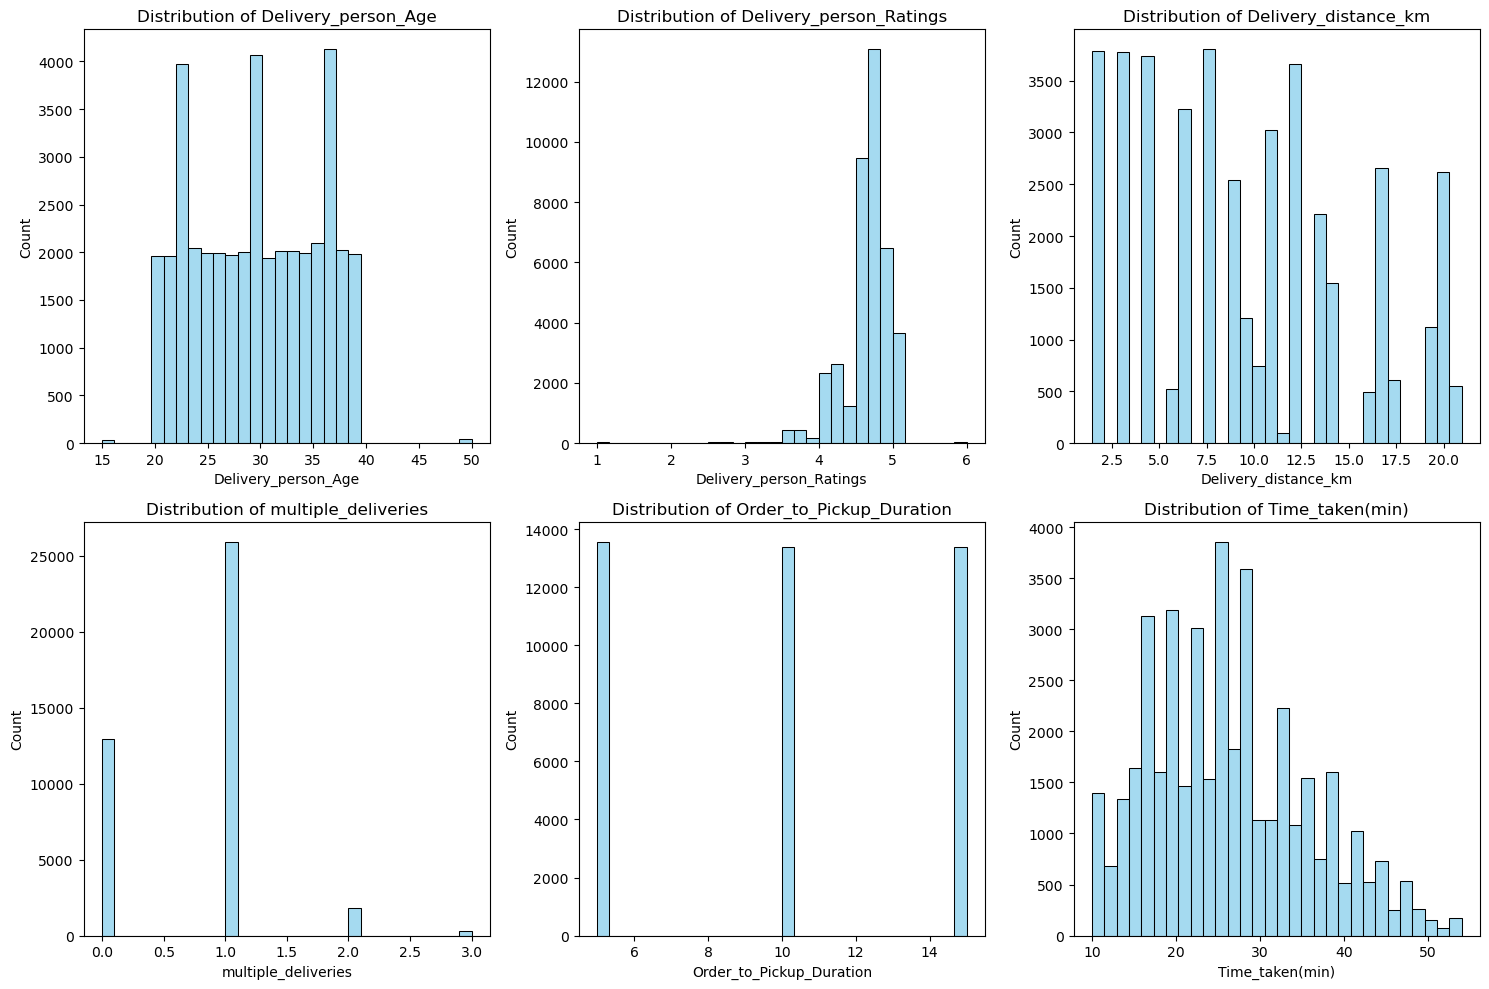

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[var].dropna(), kde=False, bins=30, color='skyblue')
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

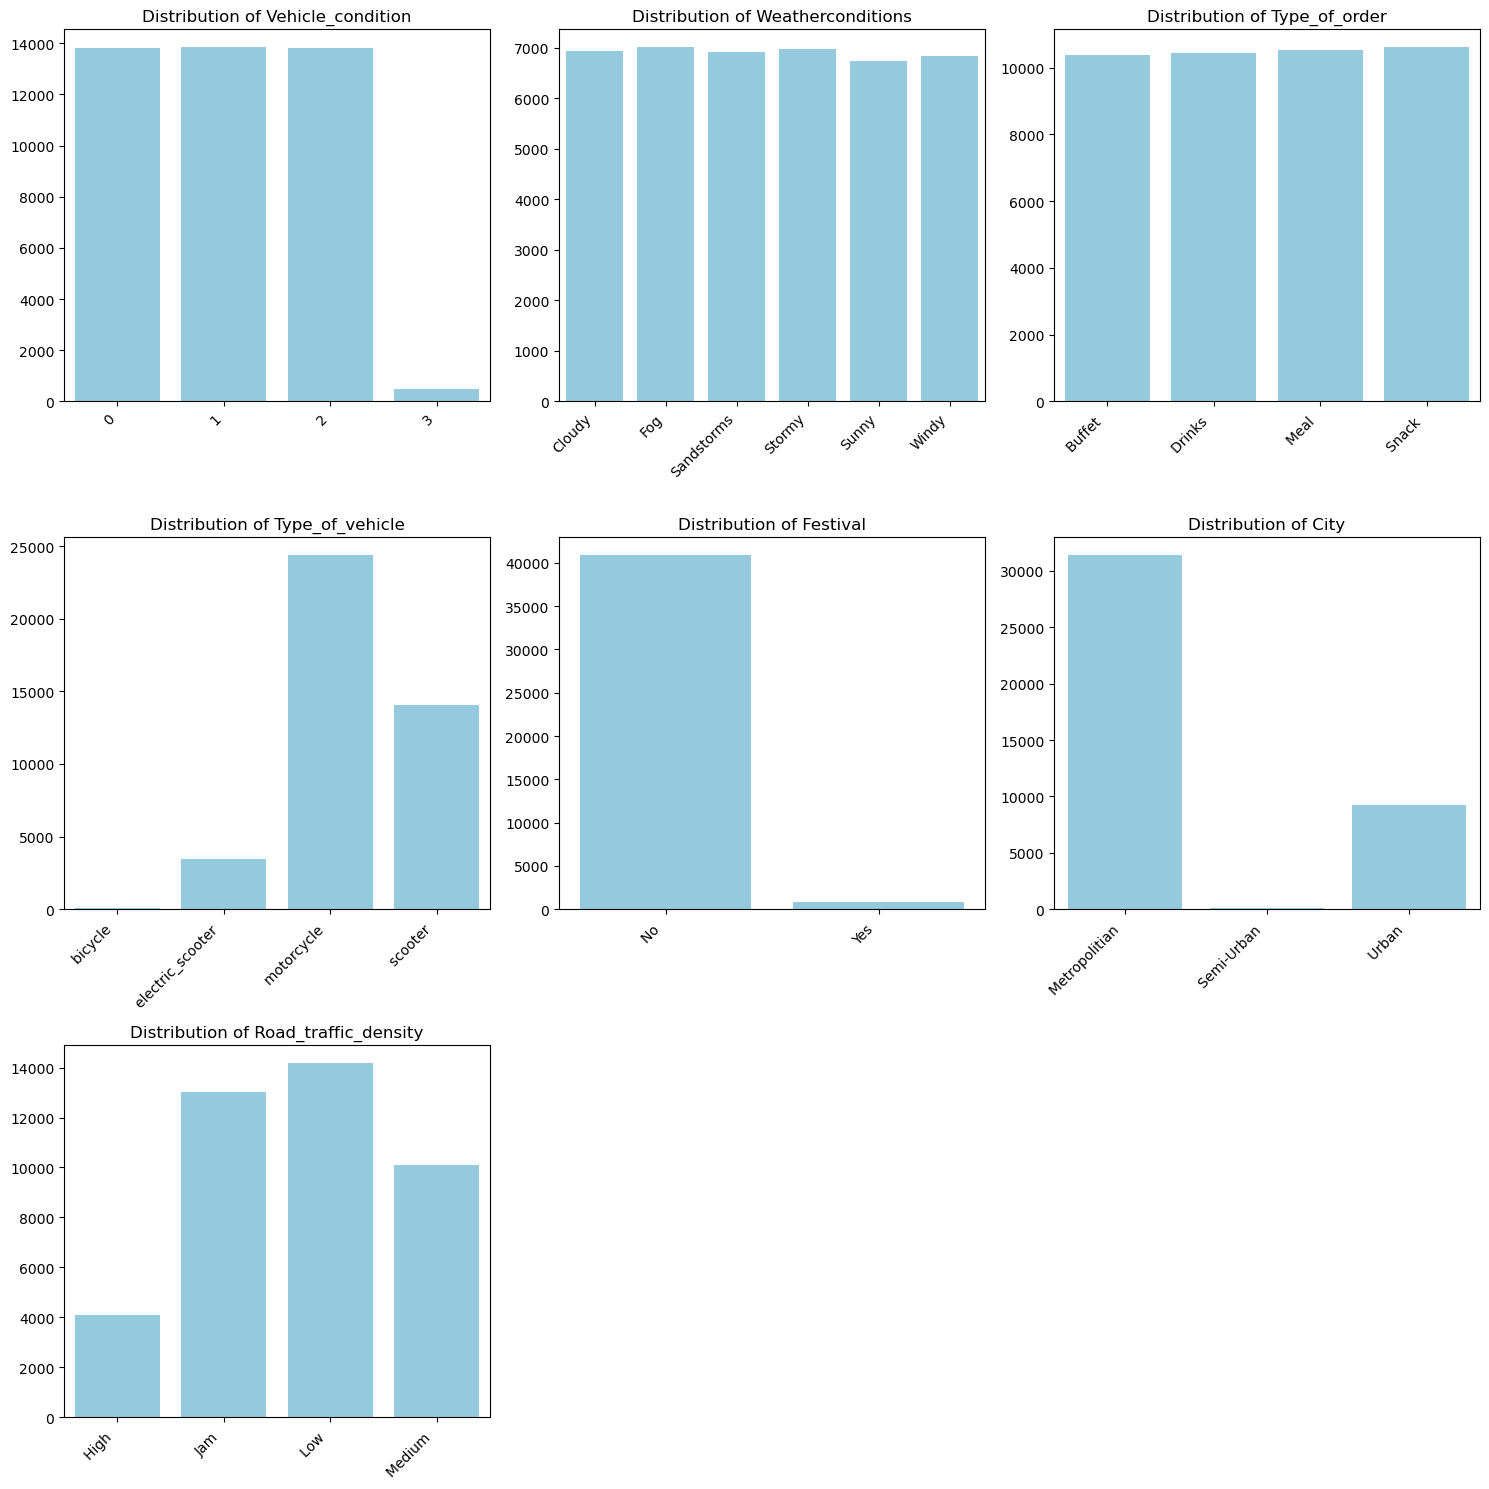

In [17]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

n_vars = len(categorical_vars)
cols = 3
rows = math.ceil(n_vars / cols)

plt.figure(figsize=(5 * cols, 5 * rows))

for i, var in enumerate(categorical_vars):
    plt.subplot(rows, cols, i + 1)

    # Step 1: Drop true NaNs
    series = data[var].dropna()

    # Step 2: Drop 'NaN' string-like values (case-insensitive, safe)
    series = series[series.astype(str).str.strip().str.lower() != 'nan']

    # Step 3: If categorical, remove *all unused* categories
    if pd.api.types.is_categorical_dtype(series):
        series = series.cat.remove_unused_categories()

    if not series.empty:
        sns.countplot(x=series, color='skyblue')
        plt.title(f'Distribution of {var}')
        plt.xticks(rotation=45, ha='right')
    else:
        plt.text(0.5, 0.5, 'No Data Available', ha='center', va='center')
        plt.title(f'{var} (No Data)')

    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()




In [19]:
#according to the above figure, choose 'Delivery_person_Ratings', 'Festival', and 'City' 
#missing values with the mode (most frequent value)

import numpy as np

# Fill Delivery_person_Ratings with mode
data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].mode()[0], inplace=True)

# Clean and fill Festival
data['Festival'] = data['Festival'].astype(str).str.strip().replace('NaN', np.nan)
data['Festival'].fillna(data['Festival'].mode()[0], inplace=True)

# Clean and fill City
data['City'] = data['City'].astype(str).str.strip().replace('NaN', np.nan)
data['City'].fillna(data['City'].mode()[0], inplace=True)


In [21]:
import numpy as np
import pandas as pd

# Replace string "NaN" with actual np.nan across the entire DataFrame
data.replace("NaN", np.nan, inplace=True)

# Convert all object-type columns to string, strip whitespaces, lowercase, and replace 'nan' with np.nan
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype(str).str.strip().str.lower().replace('nan', np.nan)


# Columns with encoded string 'nan' that may still exist as categories
cols_to_clean = ['City', 'Festival', 'Road_traffic_density']

for col in cols_to_clean:
    # Convert to string, strip whitespace, lowercase everything
    data[col] = data[col].astype(str).str.strip().str.lower()
    
    # Replace 'nan' and 'none' strings with actual np.nan
    data[col] = data[col].replace(['nan', 'none'], np.nan)
    
    # Optional: Convert back to category if needed
    data[col] = data[col].astype('category')



In [23]:
# Clean NaNs or string 'NaN' in the 'Type_of_vehicle' column
data['Type_of_vehicle'] = data['Type_of_vehicle'].replace('NaN', pd.NA)  # Replace 'NaN' string with actual NaN
data = data.dropna(subset=['Type_of_vehicle'])  # Remove rows where 'Type_of_vehicle' is NaN

# Check unique values after cleaning
print(data['Type_of_vehicle'].unique())


['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle ']
Categories (4, object): ['bicycle ', 'electric_scooter ', 'motorcycle ', 'scooter ']


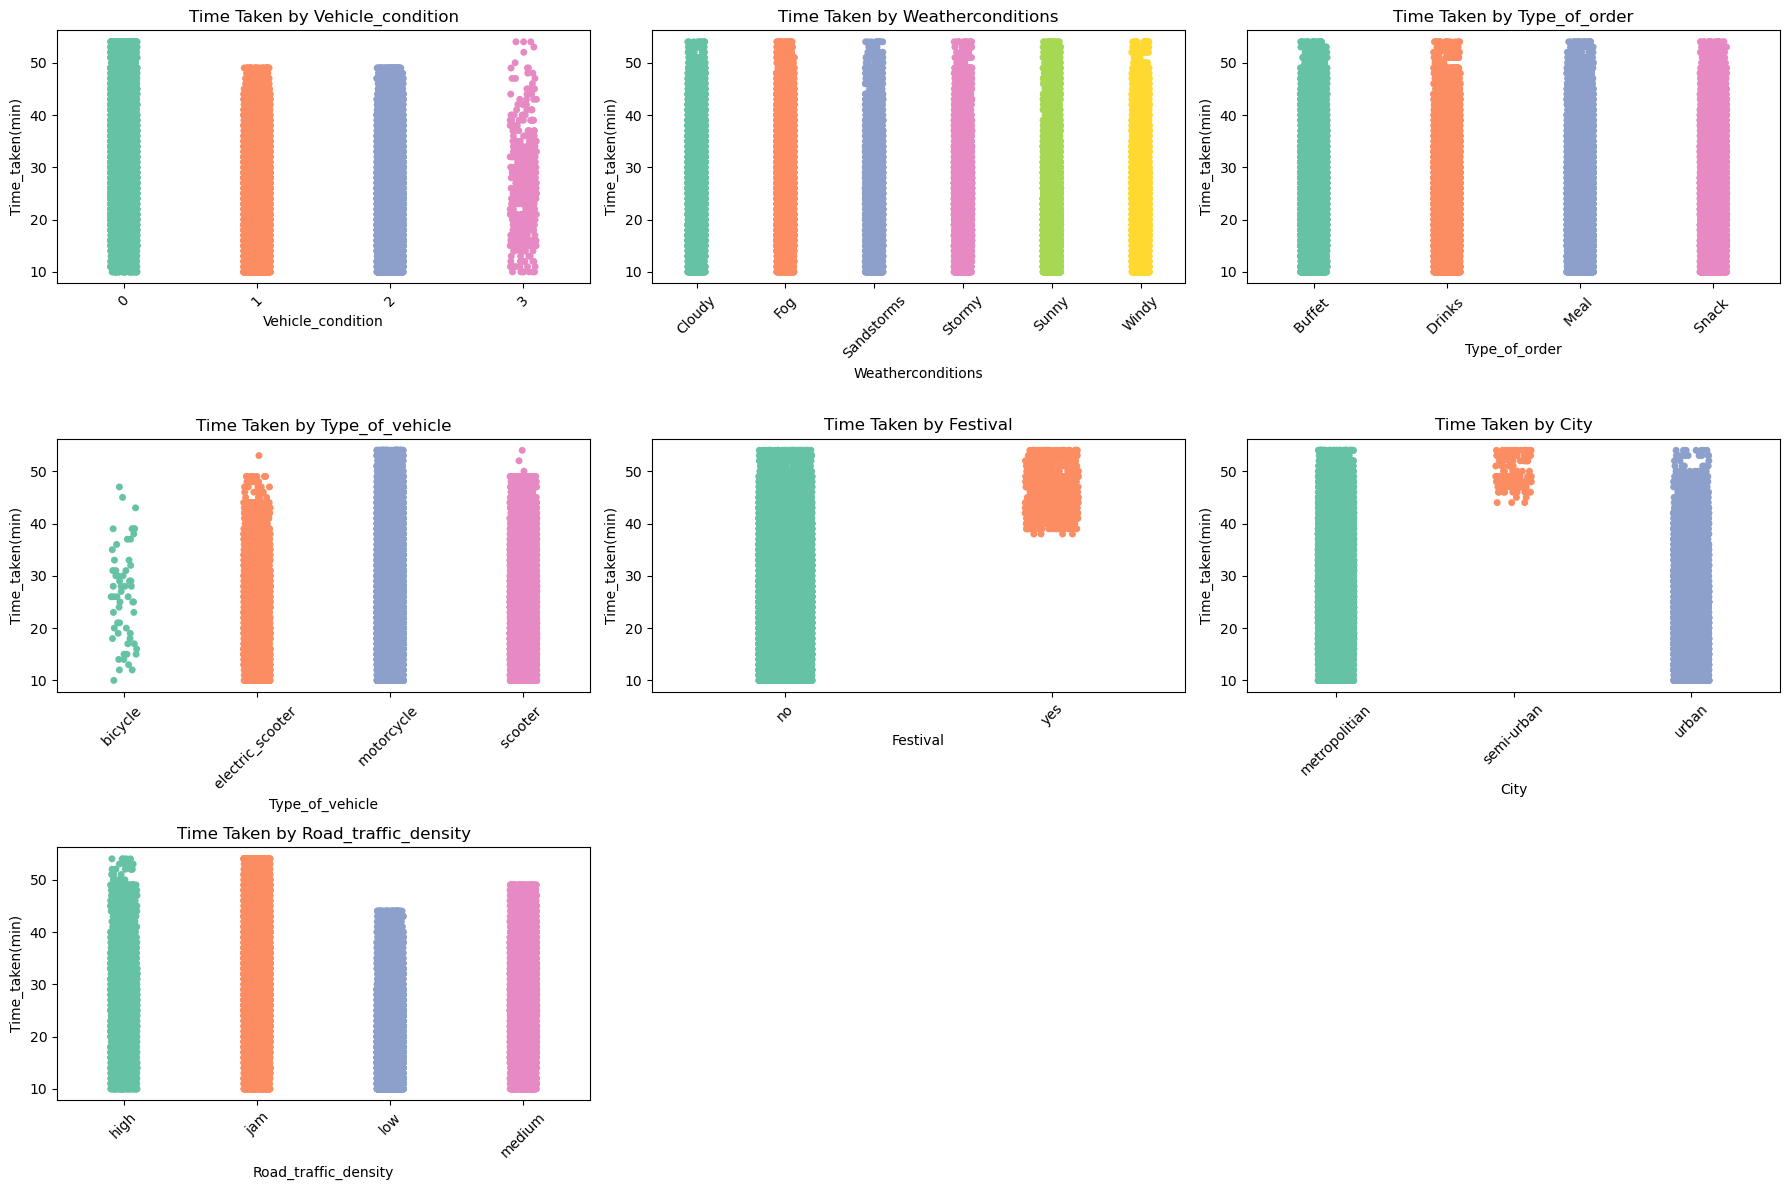

In [21]:
plt.figure(figsize=(18, 12))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    sns.stripplot(data=data, x=var, y='Time_taken(min)', palette='Set2', jitter=True)
    plt.xticks(rotation=45)
    plt.title(f'Time Taken by {var}')
plt.tight_layout()
plt.show()

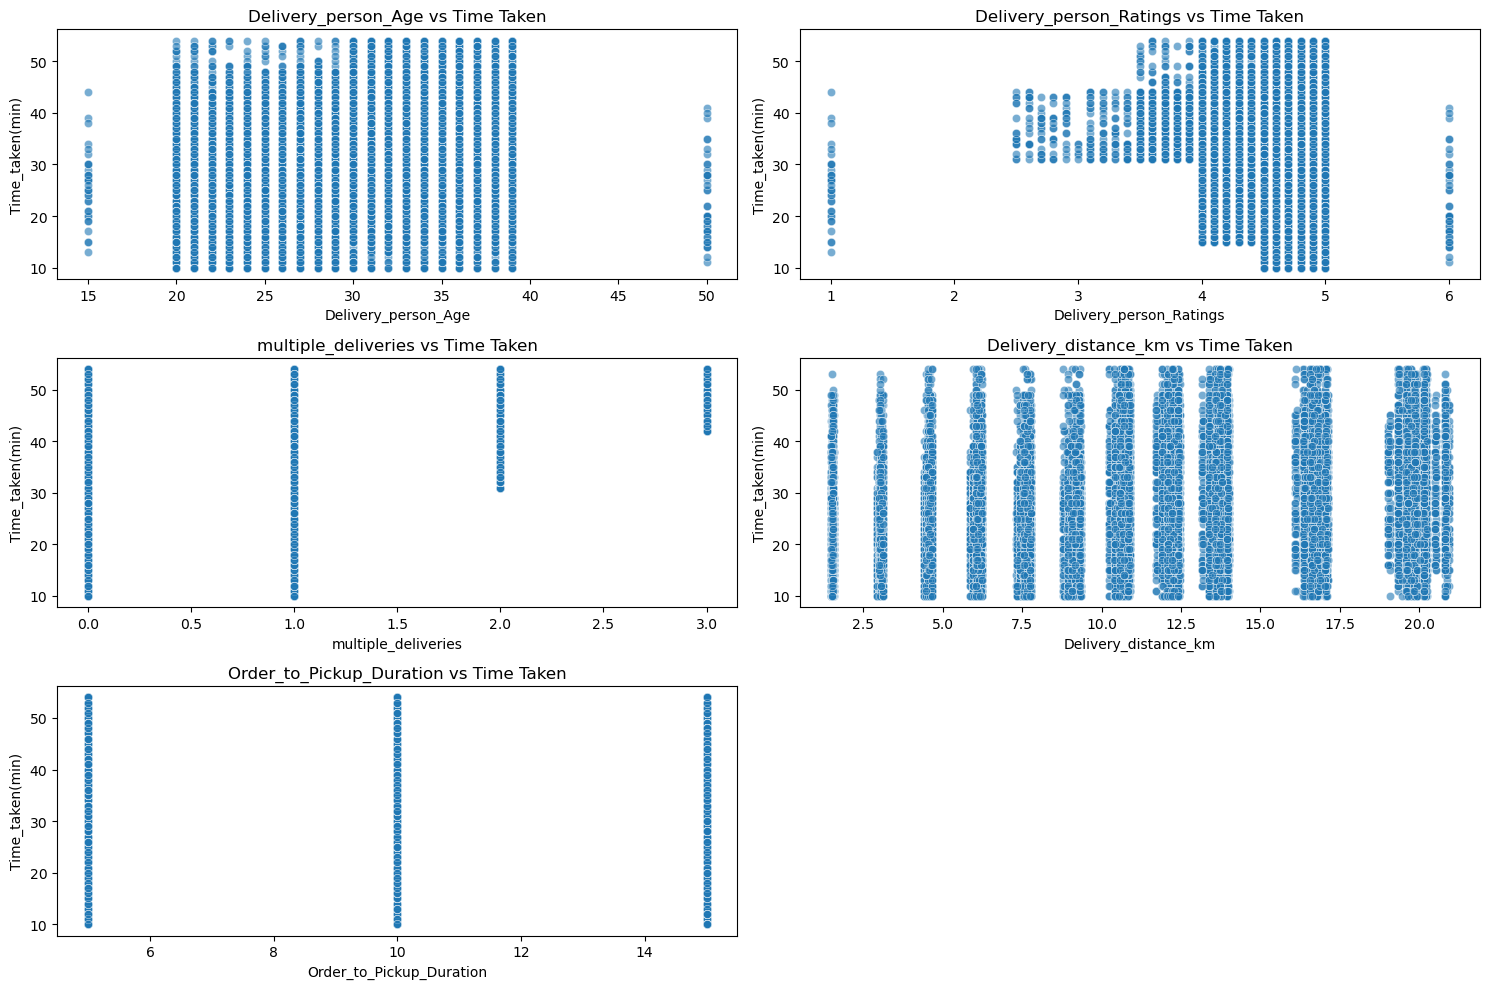

In [22]:
numeric_vs_time = ['Delivery_person_Age', 'Delivery_person_Ratings', 
                   'multiple_deliveries', 'Delivery_distance_km', 'Order_to_Pickup_Duration']

plt.figure(figsize=(15, 10))
for i, var in enumerate(numeric_vs_time):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=data, x=var, y='Time_taken(min)', alpha=0.6)
    plt.title(f'{var} vs Time Taken')
plt.tight_layout()
plt.show()

In [25]:
#scaling and transforming/encoding
numerical_vars = ['Delivery_person_Age', 'Delivery_person_Ratings', 
                  'Delivery_distance_km', 'multiple_deliveries','Order_to_Pickup_Duration']

categorical_vars = ['Vehicle_condition', 'Weatherconditions', 'Type_of_order',
                    'Type_of_vehicle', 'Festival', 'City', 'Road_traffic_density']

y = data['Time_taken(min)']


In [27]:
#check the original records， and remove these missing value records. only 4%

original_rows = data.shape[0]

data_cleaned = data.replace(['NaN', 'NaN '], np.nan)
data_cleaned.dropna(inplace=True)

cleaned_rows = data_cleaned.shape[0]

deleted_rows = original_rows - cleaned_rows
print(deleted_rows/original_rows)
data = data_cleaned

0.06309441517889067


In [29]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Strip and replace 'NaN' strings with actual np.nan
for col in categorical_vars:
    data[col] = data[col].astype(str).str.strip()
    data[col] = data[col].replace('NaN', np.nan)

# Encode 'Road_traffic_density' with label encoding (ordinal)
road_traffic_order = ['Low', 'Medium', 'High', 'Jam']
label_encoder = LabelEncoder()
data['Rd_traffic_density'] = label_encoder.fit_transform(data['Road_traffic_density'].fillna('Missing'))

# One-Hot Encode the rest (drop_first=True to avoid multicollinearity)
one_hot_cols = ['Weatherconditions', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

# Drop the original 'Road_traffic_density' column (optional, now replaced)
data.drop(columns='Road_traffic_density', inplace=True)


In [31]:
# Now define X and y for modeling
# Define target and features
X = data.drop(columns=[
    'Time_taken(min)',        # target
    'ID',                     # unique identifier
    'Delivery_person_ID',     # personal identifier
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude',
    'Order_Date',
    'Time_Orderd',
    'Time_Order_picked'
])

y = data['Time_taken(min)']

# Print shapes
print("X shape:", X.shape)
print("y shape:", y.shape)



X shape: (39306, 20)
y shape: (39306,)


In [27]:
data.to_csv(r'C:\Users\hp\OneDrive - The University of Texas at Dallas\Spring 2025\Applied ML\Project\finaldata2.csv', index=False)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [35]:
# Splitting Data

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       
    random_state=42             
)

In [37]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale numerical columns in X_train
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numerical_vars]),
    columns=numerical_vars,
    index=X_train.index
)

# Scale numerical columns in X_test (only transform!)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numerical_vars]),
    columns=numerical_vars,
    index=X_test.index
)

# Drop old numerical columns
X_train.drop(columns=numerical_vars, inplace=True)
X_test.drop(columns=numerical_vars, inplace=True)

# Add scaled data back
X_train = pd.concat([X_train, X_train_scaled], axis=1)
X_test = pd.concat([X_test, X_test_scaled], axis=1)


In [31]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions_Sunny,Weatherconditions_Windy,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_yes,City_semi-urban,City_urban
0,0x4607,indores13del02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,2025-04-15 11:30:00,...,True,False,False,False,True,True,False,False,False,True
1,0xb379,bangres18del02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,2025-04-15 19:45:00,...,False,False,False,False,True,False,True,False,False,False
2,0x5d6d,bangres19del01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,2025-04-15 08:30:00,...,False,False,True,False,False,True,False,False,False,True
3,0x7a6a,coimbres13del02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,2025-04-15 18:00:00,...,True,False,False,False,False,True,False,False,False,False
4,0x70a2,chenres12del01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,2025-04-15 13:30:00,...,False,False,False,False,True,False,True,False,False,False


In [33]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define Linear SVR model
linear_svr = SVR(kernel='linear')

# Define a list of hyperparameters
params_svr = {'C': [0.001, 0.01, 0.1, 1]}

# Run GridSearchCV
grid_linearsvr = GridSearchCV(linear_svr, params_svr, n_jobs=2, cv=5)
grid_linearsvr.fit(X_train, y_train)

# Best parameters and score
print("Best Params:", grid_linearsvr.best_params_)
print("Best CV Score (negative MSE):", grid_linearsvr.best_score_)

# Evaluate on test set
y_pred = grid_linearsvr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"Test R²: {r2:.4f}")


Best Params: {'C': 1}
Best CV Score (negative MSE): 0.526020597005339
Test RMSE: 6.40
Test MAE: 5.12
Test R²: 0.5319


In [39]:
# Define Linear SVR model
linear_svr = SVR(kernel='linear')

# Define a list of hyperparameters
params_svr = {'C': [1, 10]}

# Run GridSearchCV
grid_linearsvr = GridSearchCV(linear_svr, params_svr, n_jobs=2, cv=5)
grid_linearsvr.fit(X_train, y_train)

# Best parameters and score
print("Best Params:", grid_linearsvr.best_params_)
print("Best CV Score (negative MSE):", grid_linearsvr.best_score_)

# Evaluate on test set
y_pred = grid_linearsvr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"Test R²: {r2:.4f}")

Best Params: {'C': 10}
Best CV Score (negative MSE): 0.5261297331540172
Test RMSE: 6.40
Test MAE: 5.12
Test R²: 0.5320


In [59]:
from sklearn.experimental import enable_halving_search_cv  # enable experimental feature
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.svm import SVR
from scipy.stats import loguniform

# Define the model
svr = SVR(kernel='rbf')

# Define the hyperparameter search space
param_dist = {
    'C': loguniform(1e-2, 1e3),
    'gamma': loguniform(1e-4, 1),
    'epsilon': [0.1, 0.2, 0.3]
}

# Halving Random Search
halving_search = HalvingRandomSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    factor=3,                  # how aggressively to cut off bad configs
    resource='n_samples',      # reduce training sample size
    max_resources='auto',      # uses full dataset eventually
    random_state=0,
    n_jobs=-1,
    cv=3,
    verbose=1
)

halving_search.fit(X_train, y_train)


n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 6
max_resources_: 27514
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4585
n_resources: 6
Fitting 3 folds for each of 4585 candidates, totalling 13755 fits
----------
iter: 1
n_candidates: 1529
n_resources: 18
Fitting 3 folds for each of 1529 candidates, totalling 4587 fits
----------
iter: 2
n_candidates: 510
n_resources: 54
Fitting 3 folds for each of 510 candidates, totalling 1530 fits
----------
iter: 3
n_candidates: 170
n_resources: 162
Fitting 3 folds for each of 170 candidates, totalling 510 fits
----------
iter: 4
n_candidates: 57
n_resources: 486
Fitting 3 folds for each of 57 candidates, totalling 171 fits
----------
iter: 5
n_candidates: 19
n_resources: 1458
Fitting 3 folds for each of 19 candidates, totalling 57 fits
----------
iter: 6
n_candidates: 7
n_resources: 4374
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 7
n_candidates: 3
n_re

HalvingRandomSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                      param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000012E264F9640>,
                                           'epsilon': [0.1, 0.2, 0.3],
                                           'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000012E2642D220>},
                      random_state=0, verbose=1)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = halving_search.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")

Test RMSE: 4.68
Test MAE: 3.66
Test R²: 0.7504


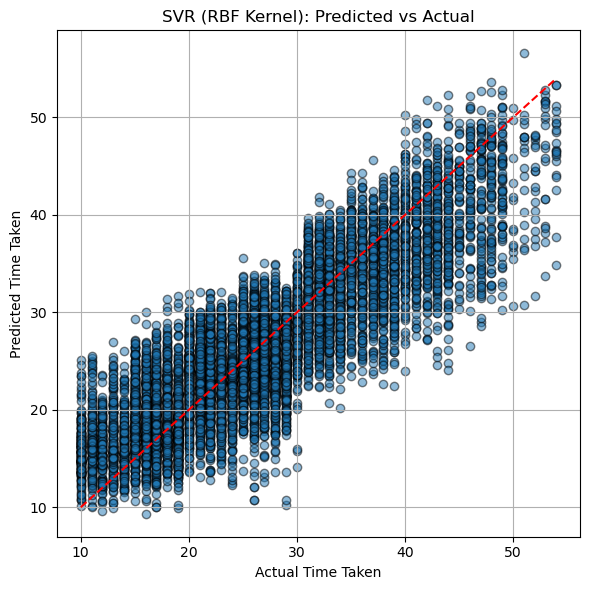

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Time Taken')
plt.ylabel('Predicted Time Taken')
plt.title('SVR (RBF Kernel): Predicted vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
!pip install optuna

import optuna
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Objective function for Optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-2, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1)
    epsilon = trial.suggest_float('epsilon', 0.05, 1.0)

    model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)

    # Using negative RMSE as the score to maximize
    score = cross_val_score(
        model, X_train, y_train,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=3, n_jobs=-1
    )
    return score.mean()

# Logging callback for verbose output
def logging_callback(study, trial):
    print(f"Trial {trial.number}: RMSE = {-trial.value:.4f}, Params = {trial.params}")

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, n_jobs=-1, callbacks=[logging_callback])

# Best params
print("Best parameters:", study.best_params_)

best_svr = SVR(kernel='rbf', **study.best_params_)
best_svr.fit(X_train, y_train)

y_pred = best_svr.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0


[I 2025-04-16 11:07:01,230] A new study created in memory with name: no-name-ef258e72-575c-4a95-9a12-b64fd824084d
[I 2025-04-16 11:08:46,841] Trial 2 finished with value: -42.0926029435216 and parameters: {'C': 184.80891963063556, 'gamma': 0.00010387798044782012, 'epsilon': 0.1943170270559066}. Best is trial 2 with value: -42.0926029435216.


Trial 2: RMSE = 42.0926, Params = {'C': 184.80891963063556, 'gamma': 0.00010387798044782012, 'epsilon': 0.1943170270559066}


[I 2025-04-16 11:10:08,719] Trial 3 finished with value: -39.530472748037745 and parameters: {'C': 0.12699498932709208, 'gamma': 0.037286624577657385, 'epsilon': 0.5980646134009029}. Best is trial 3 with value: -39.530472748037745.


Trial 3: RMSE = 39.5305, Params = {'C': 0.12699498932709208, 'gamma': 0.037286624577657385, 'epsilon': 0.5980646134009029}


[I 2025-04-16 11:11:29,114] Trial 0 finished with value: -36.75795090391417 and parameters: {'C': 0.12328298919634069, 'gamma': 0.073957520333049, 'epsilon': 0.9474828762546275}. Best is trial 0 with value: -36.75795090391417.


Trial 0: RMSE = 36.7580, Params = {'C': 0.12328298919634069, 'gamma': 0.073957520333049, 'epsilon': 0.9474828762546275}


[I 2025-04-16 11:11:43,352] Trial 1 finished with value: -83.24596560612817 and parameters: {'C': 0.025724920662496247, 'gamma': 0.6023490387745849, 'epsilon': 0.05817838850213127}. Best is trial 0 with value: -36.75795090391417.


Trial 1: RMSE = 83.2460, Params = {'C': 0.025724920662496247, 'gamma': 0.6023490387745849, 'epsilon': 0.05817838850213127}


[I 2025-04-16 11:12:59,941] Trial 4 finished with value: -26.678243828264286 and parameters: {'C': 0.6615947199995775, 'gamma': 0.14901001071888034, 'epsilon': 0.5207494242269304}. Best is trial 4 with value: -26.678243828264286.


Trial 4: RMSE = 26.6782, Params = {'C': 0.6615947199995775, 'gamma': 0.14901001071888034, 'epsilon': 0.5207494242269304}


[I 2025-04-16 11:14:26,701] Trial 5 finished with value: -31.793191344073108 and parameters: {'C': 37.59043693120424, 'gamma': 0.00665424795251781, 'epsilon': 0.6768132749974333}. Best is trial 4 with value: -26.678243828264286.


Trial 5: RMSE = 31.7932, Params = {'C': 37.59043693120424, 'gamma': 0.00665424795251781, 'epsilon': 0.6768132749974333}


[I 2025-04-16 11:16:39,137] Trial 6 finished with value: -21.941748504078195 and parameters: {'C': 74.47717820079427, 'gamma': 0.06566707268553666, 'epsilon': 0.941247669804598}. Best is trial 6 with value: -21.941748504078195.


Trial 6: RMSE = 21.9417, Params = {'C': 74.47717820079427, 'gamma': 0.06566707268553666, 'epsilon': 0.941247669804598}


[I 2025-04-16 11:17:05,632] Trial 7 finished with value: -36.57541053233137 and parameters: {'C': 7.445399505225635, 'gamma': 0.005296990896362213, 'epsilon': 0.3072328726729299}. Best is trial 6 with value: -21.941748504078195.


Trial 7: RMSE = 36.5754, Params = {'C': 7.445399505225635, 'gamma': 0.005296990896362213, 'epsilon': 0.3072328726729299}


[I 2025-04-16 11:18:21,550] Trial 8 finished with value: -50.4182559475166 and parameters: {'C': 0.26928336368632816, 'gamma': 0.0017861385788342508, 'epsilon': 0.19640064476302832}. Best is trial 6 with value: -21.941748504078195.


Trial 8: RMSE = 50.4183, Params = {'C': 0.26928336368632816, 'gamma': 0.0017861385788342508, 'epsilon': 0.19640064476302832}


[I 2025-04-16 11:22:09,153] Trial 10 finished with value: -35.302854867077976 and parameters: {'C': 233.99796639827895, 'gamma': 0.0012406905886042329, 'epsilon': 0.8301282879431467}. Best is trial 6 with value: -21.941748504078195.


Trial 10: RMSE = 35.3029, Params = {'C': 233.99796639827895, 'gamma': 0.0012406905886042329, 'epsilon': 0.8301282879431467}


[I 2025-04-16 11:25:18,887] Trial 9 finished with value: -25.540315395211227 and parameters: {'C': 23.846362502804283, 'gamma': 0.4932008503352696, 'epsilon': 0.6963719950635489}. Best is trial 6 with value: -21.941748504078195.


Trial 9: RMSE = 25.5403, Params = {'C': 23.846362502804283, 'gamma': 0.4932008503352696, 'epsilon': 0.6963719950635489}


[I 2025-04-16 11:26:48,969] Trial 11 finished with value: -22.01125285324071 and parameters: {'C': 78.48236677105966, 'gamma': 0.06149859062972936, 'epsilon': 0.8434947426489533}. Best is trial 6 with value: -21.941748504078195.


Trial 11: RMSE = 22.0113, Params = {'C': 78.48236677105966, 'gamma': 0.06149859062972936, 'epsilon': 0.8434947426489533}


[I 2025-04-16 11:27:08,468] Trial 12 finished with value: -47.101230269922105 and parameters: {'C': 0.5200257788904017, 'gamma': 0.001877117580654019, 'epsilon': 0.8469961706308765}. Best is trial 6 with value: -21.941748504078195.


Trial 12: RMSE = 47.1012, Params = {'C': 0.5200257788904017, 'gamma': 0.001877117580654019, 'epsilon': 0.8469961706308765}


[I 2025-04-16 11:33:20,337] Trial 13 finished with value: -32.39122202568079 and parameters: {'C': 796.8535028587825, 'gamma': 0.8692371061167511, 'epsilon': 0.9757194802825131}. Best is trial 6 with value: -21.941748504078195.


Trial 13: RMSE = 32.3912, Params = {'C': 796.8535028587825, 'gamma': 0.8692371061167511, 'epsilon': 0.9757194802825131}


[I 2025-04-16 11:36:52,137] Trial 14 finished with value: -34.665533693788056 and parameters: {'C': 10.917615996354629, 'gamma': 0.9956841531684751, 'epsilon': 0.9609215314187756}. Best is trial 6 with value: -21.941748504078195.


Trial 14: RMSE = 34.6655, Params = {'C': 10.917615996354629, 'gamma': 0.9956841531684751, 'epsilon': 0.9609215314187756}


[I 2025-04-16 11:44:38,399] Trial 15 finished with value: -22.348053222534418 and parameters: {'C': 988.5707729154072, 'gamma': 0.031468215632506985, 'epsilon': 0.9978248488361273}. Best is trial 6 with value: -21.941748504078195.


Trial 15: RMSE = 22.3481, Params = {'C': 988.5707729154072, 'gamma': 0.031468215632506985, 'epsilon': 0.9978248488361273}


[I 2025-04-16 11:45:55,034] Trial 17 finished with value: -24.147293600357674 and parameters: {'C': 46.573527296251086, 'gamma': 0.026902573766313366, 'epsilon': 0.8048392350320409}. Best is trial 6 with value: -21.941748504078195.


Trial 17: RMSE = 24.1473, Params = {'C': 46.573527296251086, 'gamma': 0.026902573766313366, 'epsilon': 0.8048392350320409}


[I 2025-04-16 11:47:01,706] Trial 16 finished with value: -22.51957142971605 and parameters: {'C': 559.6109776999704, 'gamma': 0.02382916996997805, 'epsilon': 0.9911370692092438}. Best is trial 6 with value: -21.941748504078195.


Trial 16: RMSE = 22.5196, Params = {'C': 559.6109776999704, 'gamma': 0.02382916996997805, 'epsilon': 0.9911370692092438}


[I 2025-04-16 11:47:30,423] Trial 18 finished with value: -23.65641734409071 and parameters: {'C': 70.55944272971462, 'gamma': 0.02633651209529816, 'epsilon': 0.7996148873567457}. Best is trial 6 with value: -21.941748504078195.


Trial 18: RMSE = 23.6564, Params = {'C': 70.55944272971462, 'gamma': 0.02633651209529816, 'epsilon': 0.7996148873567457}


[I 2025-04-16 11:51:28,141] Trial 20 finished with value: -22.49943702339638 and parameters: {'C': 2.7122781800697413, 'gamma': 0.18830105011729975, 'epsilon': 0.42908940667720186}. Best is trial 6 with value: -21.941748504078195.


Trial 20: RMSE = 22.4994, Params = {'C': 2.7122781800697413, 'gamma': 0.18830105011729975, 'epsilon': 0.42908940667720186}


[I 2025-04-16 11:55:22,546] Trial 21 finished with value: -22.557569101868307 and parameters: {'C': 2.648227728305845, 'gamma': 0.17904595255809233, 'epsilon': 0.48539828378723276}. Best is trial 6 with value: -21.941748504078195.


Trial 21: RMSE = 22.5576, Params = {'C': 2.648227728305845, 'gamma': 0.17904595255809233, 'epsilon': 0.48539828378723276}


[I 2025-04-16 11:58:05,925] Trial 19 finished with value: -22.979995049424687 and parameters: {'C': 71.48465295153161, 'gamma': 0.13917616664378193, 'epsilon': 0.7958003000238192}. Best is trial 6 with value: -21.941748504078195.


Trial 19: RMSE = 22.9800, Params = {'C': 71.48465295153161, 'gamma': 0.13917616664378193, 'epsilon': 0.7958003000238192}


[I 2025-04-16 11:58:28,514] Trial 22 finished with value: -22.459299822055986 and parameters: {'C': 3.1613986921115056, 'gamma': 0.15600300457463248, 'epsilon': 0.4674389298815346}. Best is trial 6 with value: -21.941748504078195.


Trial 22: RMSE = 22.4593, Params = {'C': 3.1613986921115056, 'gamma': 0.15600300457463248, 'epsilon': 0.4674389298815346}


[I 2025-04-16 11:59:18,999] Trial 23 finished with value: -23.425402861430417 and parameters: {'C': 1.6216108646784824, 'gamma': 0.20933551361124464, 'epsilon': 0.7318347700876227}. Best is trial 6 with value: -21.941748504078195.


Trial 23: RMSE = 23.4254, Params = {'C': 1.6216108646784824, 'gamma': 0.20933551361124464, 'epsilon': 0.7318347700876227}


[I 2025-04-16 12:04:22,153] Trial 24 finished with value: -22.23875243431603 and parameters: {'C': 155.90475276992498, 'gamma': 0.0729719016428198, 'epsilon': 0.8842690542755612}. Best is trial 6 with value: -21.941748504078195.


Trial 24: RMSE = 22.2388, Params = {'C': 155.90475276992498, 'gamma': 0.0729719016428198, 'epsilon': 0.8842690542755612}


[I 2025-04-16 12:08:35,260] Trial 26 finished with value: -26.248136600790627 and parameters: {'C': 225.6958421214496, 'gamma': 0.010552465979174341, 'epsilon': 0.8788787667800966}. Best is trial 6 with value: -21.941748504078195.


Trial 26: RMSE = 26.2481, Params = {'C': 225.6958421214496, 'gamma': 0.010552465979174341, 'epsilon': 0.8788787667800966}


[I 2025-04-16 12:11:33,718] Trial 25 finished with value: -22.44328530817894 and parameters: {'C': 230.61135842810774, 'gamma': 0.06907494135140442, 'epsilon': 0.8981830771253289}. Best is trial 6 with value: -21.941748504078195.


Trial 25: RMSE = 22.4433, Params = {'C': 230.61135842810774, 'gamma': 0.06907494135140442, 'epsilon': 0.8981830771253289}


[I 2025-04-16 12:19:30,862] Trial 27 finished with value: -22.489449534036222 and parameters: {'C': 222.5756003428273, 'gamma': 0.07171667254762898, 'epsilon': 0.8910467702688301}. Best is trial 6 with value: -21.941748504078195.


Trial 27: RMSE = 22.4894, Params = {'C': 222.5756003428273, 'gamma': 0.07171667254762898, 'epsilon': 0.8910467702688301}


[I 2025-04-16 12:20:06,734] Trial 28 finished with value: -22.179487557330518 and parameters: {'C': 151.64008155302432, 'gamma': 0.07119133219128236, 'epsilon': 0.8933916045380429}. Best is trial 6 with value: -21.941748504078195.


Trial 28: RMSE = 22.1795, Params = {'C': 151.64008155302432, 'gamma': 0.07119133219128236, 'epsilon': 0.8933916045380429}


[I 2025-04-16 12:20:20,958] Trial 29 finished with value: -23.03310663666619 and parameters: {'C': 10.174853444842956, 'gamma': 0.06319457554134346, 'epsilon': 0.8962831225154337}. Best is trial 6 with value: -21.941748504078195.


Trial 29: RMSE = 23.0331, Params = {'C': 10.174853444842956, 'gamma': 0.06319457554134346, 'epsilon': 0.8962831225154337}


AttributeError: 'Study' object has no attribute 'best_params_'

In [39]:
## Trial 6: RMSE = 21.9417, Params = {'C': 74.47717820079427, 'gamma': 0.06566707268553666, 'epsilon': 0.941247669804598}
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Trial 6 best params
trial6_params = {
    'C': 74.47717820079427,
    'gamma': 0.06566707268553666,
    'epsilon': 0.941247669804598
}

# 1. Fit the model
model_trial6 = SVR(kernel='rbf', **trial6_params)
model_trial6.fit(X_train, y_train)

# 2. Predict on test set
y_pred6 = model_trial6.predict(X_test)

# 3. Compute metrics
mse6    = mean_squared_error(y_test, y_pred6)
rmse6   = mse6 ** 0.5
mae6    = mean_absolute_error(y_test, y_pred6)
mape6   = mean_absolute_percentage_error(y_test, y_pred6)
r2_6    = r2_score(y_test, y_pred6)

# 4. Adjusted R²
n = len(y_test)
p = X_test.shape[1]
adj_r2_6 = 1 - (1 - r2_6) * (n - 1) / (n - p - 1)

# 5. Print results
print(f"MSE:   {mse6:.4f}")
print(f"RMSE:  {rmse6:.4f}")
print(f"MAE:   {mae6:.4f}")
print(f"MAPE:  {mape6:.2%}")
print(f"R²:    {r2_6:.4f}")
print(f"Adj R²:{adj_r2_6:.4f}")


MSE:   20.8240
RMSE:  4.5633
MAE:   3.5894
MAPE:  15.55%
R²:    0.7623
Adj R²:0.7619


In [43]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Base learners
estimators = [
    ('svr', SVR(kernel='rbf', **trial6_params)),               # your tuned SVR
    ('rf',  RandomForestRegressor(n_estimators=100,            # reasonably small forest
                                  max_depth=10,
                                  n_jobs=-1,
                                  random_state=0)),
    ('hgb', HistGradientBoostingRegressor(                     # fast native GBM
        max_iter=200,
        learning_rate=0.1,
        early_stopping=True,
        random_state=0))
]

# Meta‑learner
stack = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(),   # very fast, closed‑form fit
    n_jobs=-1
)

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred_stack, squared=False)
r2   = r2_score(y_test, y_pred_stack)
print(f"Stacking RMSE: {rmse:.2f}   R²: {r2:.4f}")


Stacking RMSE: 3.77   R²: 0.8380


In [45]:
mse   = mean_squared_error(y_test, y_pred_stack)
rmse  = mean_squared_error(y_test, y_pred_stack, squared=False)
mae   = mean_absolute_error(y_test, y_pred_stack)
mape  = mean_absolute_percentage_error(y_test, y_pred_stack)
r2    = r2_score(y_test, y_pred_stack)

# 2. Adjusted R²
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 3. Print them out
print(f"MSE:    {mse:.4f}")
print(f"RMSE:   {rmse:.4f}")
print(f"MAE:    {mae:.4f}")
print(f"MAPE:   {mape:.2%}")
print(f"R²:     {r2:.4f}")
print(f"Adj R²: {adj_r2:.4f}")

MSE:    14.1881
RMSE:   3.7667
MAE:    3.0515
MAPE:   13.25%
R²:     0.8380
Adj R²: 0.8378
